<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/GDAL_Fiona_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
https://gdal.org/en/stable/
```



In [1]:
from osgeo import gdal, osr

In [3]:
import numpy as np

In [4]:
driver = gdal.GetDriverByName('GTiff')
out_ds = driver.Create('output.tif',
                       xsize=500,
                       ysize=500,
                       bands=1,
                       eType=gdal.GDT_Float32)

# Set georeferencing
geotransform = (10.0, 0.0001, 0.0, 50.0, 0.0, -0.0001)
out_ds.SetGeoTransform(geotransform)

# Set CRS
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)
out_ds.SetProjection(srs.ExportToWkt())

# Write data
band = out_ds.GetRasterBand(1)
band.WriteArray(np.random.rand(500,500))
band.SetNoDataValue(-9999)
out_ds.FlushCache()

In [5]:


import numpy as np
from osgeo import gdal

# Open the TIFF file
dataset = gdal.Open('output.tif')

if dataset is None:
    print("Could not open the file.")
else:
    # Get the raster band
    band = dataset.GetRasterBand(1)

    # Read the data as a NumPy array
    data = band.ReadAsArray()

    # Print some information about the data
    print("Data type:", data.dtype)
    print("Data shape:", data.shape)
    print("No data value:", band.GetNoDataValue())

    # Example: Print a small portion of the data
    print("\nSample data:")
    print(data[:5, :5])  # Print the first 5x5 values


    # Close the dataset
    dataset = None


Data type: float32
Data shape: (500, 500)
No data value: None

Sample data:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


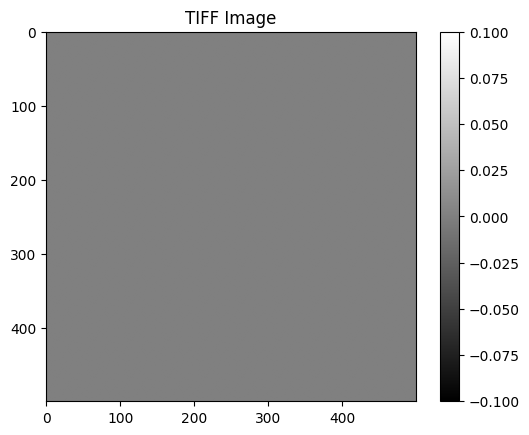

In [6]:


import matplotlib.pyplot as plt

# Open the TIFF file
dataset = gdal.Open('output.tif')

if dataset is None:
    print("Could not open the file.")
else:
    # Get the raster band
    band = dataset.GetRasterBand(1)

    # Read the data as a NumPy array
    data = band.ReadAsArray()

    # Display the image using matplotlib
    plt.imshow(data, cmap='gray')  # You can change the colormap as needed
    plt.colorbar()  # Add a colorbar for reference
    plt.title('TIFF Image')
    plt.show()

    # Close the dataset
    dataset = None
